# 6. plotting 기능 활용 2
2021-06-07

<li>영우 글로벌 러닝 판다스 보충강의 6</li>
<li>plotting 기능 활용 2</li>
<li><a href = https://www.youtube.com/watch?v=0yaFAngGJDM>강의 유튜브 링크</a>

In [47]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

mpl.rcParams["axes.unicode_minus"] = False

from pandas.plotting import scatter_matrix

In [4]:
df = pd.DataFrame(np.random.rand(50, 4), columns = list("abcd"))
df.head()

,a,b,c,d
0,0.807520,0.741610,0.868493,0.996384
1,0.364784,0.163417,0.017323,0.219176
2,0.252370,0.282086,0.035399,0.172078
3,0.206400,0.214262,0.037369,0.728246
4,0.860329,0.593141,0.104193,0.166602


<AxesSubplot:xlabel='a', ylabel='b'>

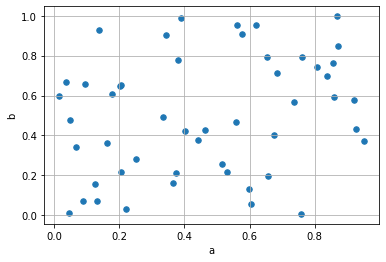

In [5]:
# scatter()

df.plot.scatter(x = "a", y = "b", s = 30, grid = True)
# size 30

<AxesSubplot:xlabel='c', ylabel='d'>

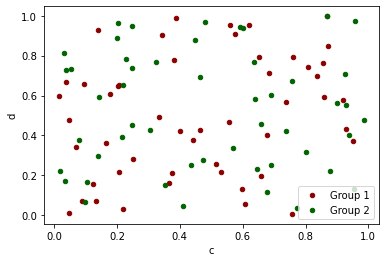

In [6]:
ax = df.plot.scatter(x = "a", y="b", color = "DarkRed", label="Group 1")
df.plot.scatter(x="c", y="d", color="darkGreen", label="Group 2", ax=ax)
# ax에 해당하는 플랏 추가해서 표시

<AxesSubplot:xlabel='a', ylabel='b'>

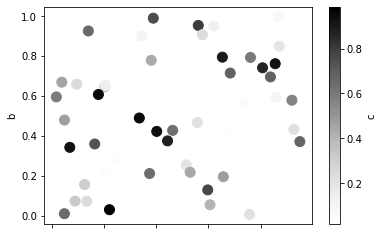

In [7]:
df.plot.scatter(x="a", y="b", c="c", s=100)
# c : color, s : size

<AxesSubplot:xlabel='a', ylabel='b'>

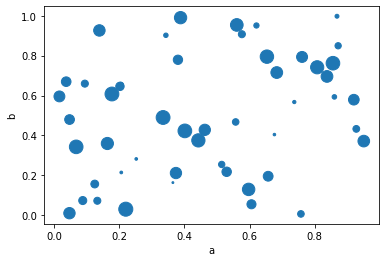

In [8]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200)
# c 값에 따라 다른 크기
# *200은 사이즈가 너무 작기 때문에 준 것

In [9]:
# Hexbin plot
# 육각형 모양의 Bin을 생성하여 그래프로 표현
# 데이터 크기 비교 가능
# 산점도 표현에서 데이터가 클 때의 단점 보완
# histogram + scatter

In [10]:
df = pd.DataFrame(np.random.rand(1000, 2), columns = list("ab"))
df.b.head()

0    0.165360
1    0.794712
2    0.853632
3    0.793168
4    0.896322
Name: b, dtype: float64

<AxesSubplot:xlabel='a', ylabel='b'>

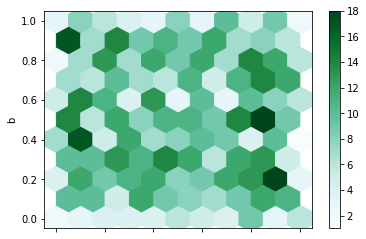

In [11]:
df.plot.hexbin(x="a", y="b", gridsize = 10)

<AxesSubplot:xlabel='a', ylabel='b'>

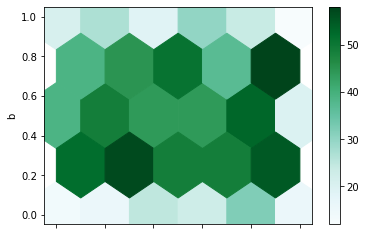

In [12]:
df.plot.hexbin(x="a", y="b", gridsize = 5)
# grid size에 따라 셀 크기가 달라짐

In [13]:
df["z"] = np.random.uniform(0, 3, 1000)
# 0~3. 1000개, uniform
df.z.head()

0    2.645493
1    2.087694
2    1.827297
3    2.726380
4    1.769283
Name: z, dtype: float64

<AxesSubplot:xlabel='a', ylabel='b'>

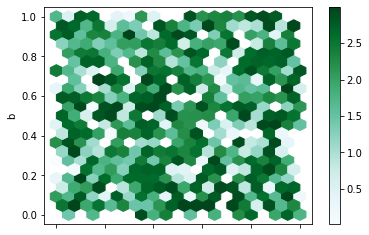

In [14]:
df.plot.hexbin(x="a", y="b", 
               C="z", reduce_C_function=np.max, 
               gridsize = 20)
# C로 인수 전달. 

<AxesSubplot:xlabel='a', ylabel='b'>

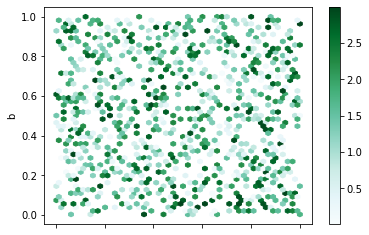

In [15]:
df.plot.hexbin(x="a", y="b", 
               C="z", reduce_C_function=np.median, 
               gridsize = 50)
# C로 인수 전달. 

<AxesSubplot:xlabel='a', ylabel='b'>

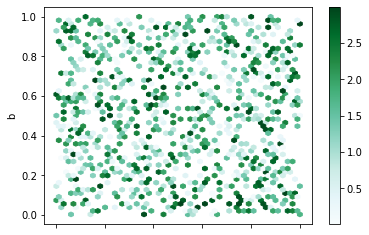

In [16]:
df.plot.hexbin(x="a", y="b", 
               C="z", reduce_C_function=np.mean, 
               gridsize = 50)
# reduce_C_function : C값을 어떻게 표현할건지
# bin의 모든 값을 단일 숫자로 줄이는 하나의 인수의 함수임

In [17]:
# pie plot
# seaborn 등 다른 모듈에서 파이차트 지원하지 않음
# 면적으로 나타나기에 딘위에 따라 오해의 소지가 존재

In [18]:
series = pd.Series(np.random.rand(4), 
                   index = list("abcd"), name = "series")
series

a    0.142749
b    0.883188
c    0.520664
d    0.927081
Name: series, dtype: float64

<AxesSubplot:ylabel='series'>

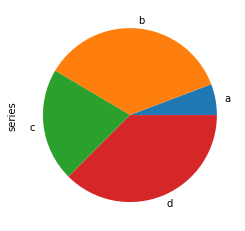

In [19]:
series.plot.pie()

<AxesSubplot:ylabel='series'>

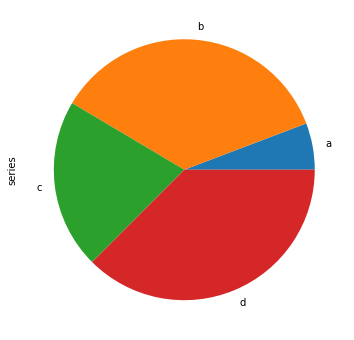

In [20]:
series.plot.pie(figsize = (6, 6))
# figsize

<AxesSubplot:ylabel='series'>

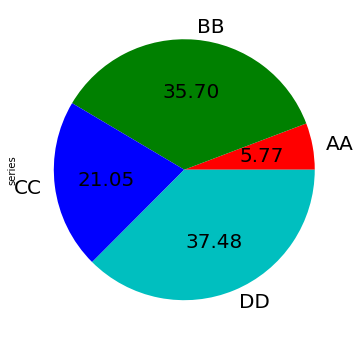

In [26]:
series.plot.pie(labels = ["AA", "BB", "CC", "DD"], 
                colors = list("rgbc"), 
                autopct = "%.2f", 
                fontsize=20,
                figsize=(6, 6))
# autopct : 차지하고 있는 비율 표시

In [28]:
df = pd.DataFrame({"mass":[0.330, 4.87, 5.97],
                "radius":[2439.7, 6051.8, 6378.1]}, 
               index = ["Mercury", "Venus", "Earth"])
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


<AxesSubplot:ylabel='mass'>

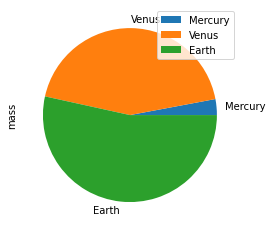

In [38]:
# df.plot.pie() 
# 오류발생. 하나의 컬럼을 잡아줘야함
# 혹은 subplots을 허용해야함

# df.plot.pie("mass")
# 오류 발생

df.plot.pie(y="mass")
# 오류 안남

<AxesSubplot:ylabel='mass'>

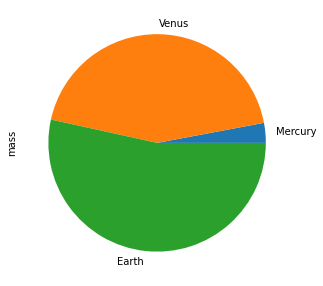

In [39]:
df_m = df.mass
df_m.plot.pie(figsize=(10, 5))

array([<AxesSubplot:ylabel='mass'>, <AxesSubplot:ylabel='radius'>],
      dtype=object)

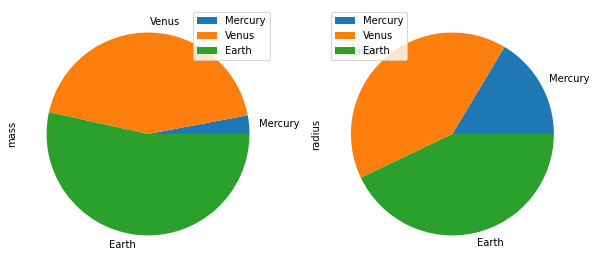

In [42]:
df.plot.pie(subplots=True, figsize=(10,5))

In [52]:
# KDE : 커널밀도함수
# Kernel Density Estimation
# 통계에서 임의 변수의 확률밀도함수(PDF)를 추정하는 비모수적 방법
# 가우스 커널을 사용하며 자동 대역폭 결정을 포함

# 비모수 통계
# 정규분포로 표현 불가

# 커널밀도 추정치
# 적절한 커널 사용, 매끄럽고 연속성과 같은 속성 부여 가능
# 히스토그램과 밀접한 관련. 이산적으로 끊어져있는 히스토그램 부드럽게 연결

# 커널함수
# 원점을 중심으로 대칭. 적분값이 1인 함수

# 정규분포(Normal Distribution) / 가우시안 분포(Gaussian Distribution)
# 연속 확률 분포 중 하나
# 수집된 자료의 분포를 근사하는데 자주 사용
# 중심극한 정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문


# 확률밀도함수(Probability Density Estimation)
# 확률 변수의 분포를 나타내는 함수

# 확률변수
# 확률공간에서 다른 가측 공간(특별한 부분집합들의 족이 부여된 집합)으로 가는 가측함수(원상이 가측성을 보존하는 함수)
# 확률적인 과정에 따라 결정되는 변수를 나타냄

In [49]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  columns = list("abcd"))
df.head()

,a,b,c,d
0,-1.162175,-0.720161,0.750709,-1.000699
1,0.633764,-1.114640,1.618682,0.181698
2,-1.001439,1.003094,0.085424,0.012604
3,-1.865833,0.078543,0.336727,-0.614861
4,1.081785,0.083192,0.409691,-0.440724


array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

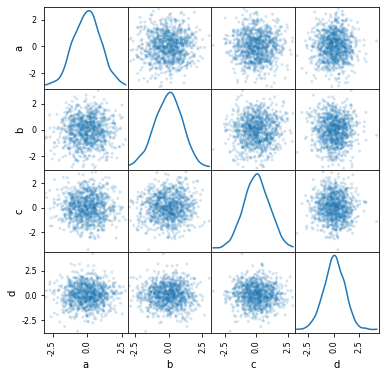

In [50]:
scatter_matrix(df, alpha = 0.2, figsize=(6, 6), 
               diagonal="kde")
# diagonal : 대각선. ked 혹은 hist 선택 가능

In [56]:
ser = pd.DataFrame(np.random.randn(1000))

<AxesSubplot:ylabel='Frequency'>

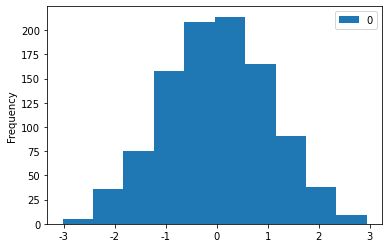

In [57]:
ser.plot.hist()

<AxesSubplot:ylabel='Density'>

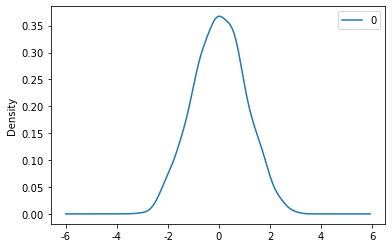

In [58]:
ser.plot.density()
# 정규분포 형태의 확률밀도함수

<AxesSubplot:ylabel='Density'>

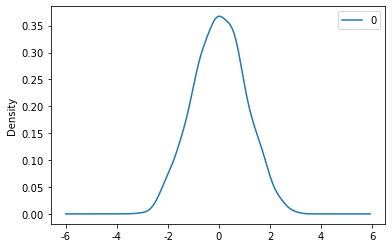

In [59]:
ser.plot.kde()